# Demo

In the code section, we will learn the swiss roll distribution. This is basically the same code as the main.py script, but in notebook form so you can interact with it.

The task is to generate samples from the swiss roll distribution, by starting with pure gaussian noise first.

A few caveats. This did not work __at all__ when I first tried. The size of noise is _really_ important, and there is a vital flaw in this method. In order to work, you really need to make sure that your initial particles are close enough to a "track" where they can lock on to an equilibrium solution. Also, you need to make sure that your noise is not so large that you are outside of the small regime where we can approximate changes to the probability distribution as gaussian. 

Finally, it's important to note that learning a distribution is also called __density estimation__ for a reason. When I first tried to make my own swiss roll data, I found everything collapsing to the origin :(. Apparently, my sampling procedure was overly dense there, so it wasn't a flaw in the model, it was a flaw in how I interpreted my data.

/Users/jonathankernes/opt/anaconda3/envs/jonny/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating model
Training


Iter: 3190. Average Loss: 0.6514: 100%|██████████| 3200/3200 [02:05<00:00, 25.56it/s]


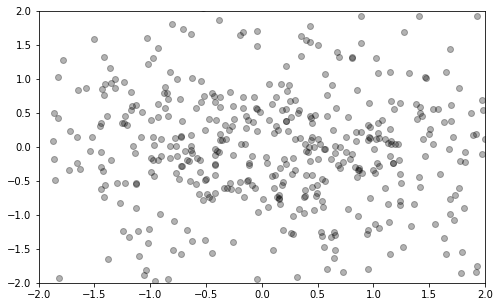

In [1]:
from diffusers import DDPM
from models import BasicDiscreteModel
from main import train, animate


d_model = 128
n_layers = 2
batch_size = 128
n_epochs = 400
sample_size = 512
steps_between_sampling = 20
seed = 42
n_steps = 100

print("Creating model")
model = BasicDiscreteModel(d_model=d_model, n_layers=n_layers)
ddpm = DDPM(n_steps=n_steps)

print("Training")
result = train(
    model=model,
    ddpm=ddpm,
    batch_size=batch_size,
    n_epochs=n_epochs,
    sample_size=sample_size,
    steps_between_sampling=steps_between_sampling,
    seed=seed,
)

anim = animate(result.samples, save=False)

In [2]:
from IPython.display import HTML
HTML(anim.to_jshtml())